In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import nilearn as nl
import nibabel as nib
import nilearn.plotting as nlplt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/resnet-18/transformers/default/1/tf_model.h5
/kaggle/input/brats-2021-task1/BraTS2021_00495.tar
/kaggle/input/brats-2021-task1/BraTS2021_Training_Data.tar
/kaggle/input/brats-2021-task1/BraTS2021_00621.tar


In [3]:
import tarfile
file = tarfile.open('../input/brats-2021-task1/BraTS2021_Training_Data.tar')

file.extractall('./BraTS2021_Training_Data')
file.close()

In [4]:
file = tarfile.open('../input/brats-2021-task1/BraTS2021_00621.tar')

file.extractall('./sample_img')
file.close()

nSample = os.listdir('./sample_img')
nSample

['BraTS2021_00621_t1.nii.gz',
 'BraTS2021_00621_t2.nii.gz',
 'BraTS2021_00621_t1ce.nii.gz',
 'BraTS2021_00621_flair.nii.gz',
 'BraTS2021_00621_seg.nii.gz']

In [5]:
nSample = os.listdir(TRAIN_DATASET_PATH + 'BraTS2021_01261')
nSample

['BraTS2021_01261_t1.nii.gz',
 'BraTS2021_01261_seg.nii.gz',
 'BraTS2021_01261_t2.nii.gz',
 'BraTS2021_01261_flair.nii.gz',
 'BraTS2021_01261_t1ce.nii.gz']

In [6]:
TRAIN_DATASET_PATH = './BraTS2021_Training_Data/'

In [7]:
test_image_flair=nib.load(TRAIN_DATASET_PATH + 'BraTS2021_01261/BraTS2021_01261_flair.nii.gz').get_fdata()
test_image_t1=nib.load(TRAIN_DATASET_PATH + 'BraTS2021_01261/BraTS2021_01261_t1.nii.gz').get_fdata()
test_image_t1ce=nib.load(TRAIN_DATASET_PATH + 'BraTS2021_01261/BraTS2021_01261_t1ce.nii.gz').get_fdata()
test_image_t2=nib.load(TRAIN_DATASET_PATH + 'BraTS2021_01261/BraTS2021_01261_t2.nii.gz').get_fdata()
test_mask=nib.load(TRAIN_DATASET_PATH + 'BraTS2021_01261/BraTS2021_01261_seg.nii.gz').get_fdata()

In [8]:
def check_nifti(file_path):
    try:
        img = nib.load(file_path)
        # Additional checks if needed
        return True
    except Exception as e:
        print(f"Error loading {file_path}: {str(e)}")
        return False

data_folder = 'path_to_extracted_data'
damaged_files = []

for root, dirs, files in os.walk(data_folder):
    for file in files:
        file_path = os.path.join(root, file)
        if file_path.endswith('.nii') or file_path.endswith('.nii.gz'):
            if not check_nifti(file_path):
                damaged_files.append(file_path)

if damaged_files:
    print("Damaged files:")
    for damaged_file in damaged_files:
        print(damaged_file)
else:
        print("No damaged files found.")

No damaged files found.


In [9]:
import os
import nibabel as nib
import tarfile
import numpy as np

# Extract the tar file
tar_file_path = '../input/brats-2021-task1/BraTS2021_00621.tar'
extracted_folder = './sample_img'

with tarfile.open(tar_file_path, 'r') as tar:
    tar.extractall(extracted_folder)

# Specify the paths
data_folder = extracted_folder
output_folder = './preprocessed_data'

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

def load_nifti(file_path):
    img = nib.load(file_path)
    return img

def save_nifti(img, save_path):nib.save(img, save_path)

def preprocess_nifti(img):
    # Example preprocessing: normalize intensity values
    data = img.get_fdata()
    
#     [[[[[normalize]]]]]
    data = (data - np.min(data)) / (np.max(data) - np.min(data))
    img = nib.Nifti1Image(data, img.affine)
    return img

def process_files(data_folder, output_folder):
    for root, dirs, files in os.walk(data_folder):
        for file in files:
            file_path = os.path.join(root, file)
            if file_path.endswith('.nii') or file_path.endswith('.nii.gz'):
                try:
                    img = load_nifti(file_path)
                    preprocessed_img = preprocess_nifti(img)
                    
                    # Save the preprocessed image
                    output_path = os.path.join(output_folder, file)
                    save_nifti(preprocessed_img, output_path)
                    
                    print(f"Processed: {file_path}")
                except Exception as e:
                    print(f"Error processing {file_path}: {str(e)}")
                    
process_files(data_folder, output_folder)

Processed: ./sample_img/BraTS2021_00621_t1.nii.gz
Processed: ./sample_img/BraTS2021_00621_t2.nii.gz
Processed: ./sample_img/BraTS2021_00621_t1ce.nii.gz
Processed: ./sample_img/BraTS2021_00621_flair.nii.gz
Processed: ./sample_img/BraTS2021_00621_seg.nii.gz


In [10]:
from skimage.transform import resize

def preprocess_nifti(img, target_shape=(256, 256, 128)):
    data = img.get_fdata()
    data_resized = resize(data, target_shape, anti_aliasing=True)
    img_resized = nib.Nifti1Image(data_resized, img.affine)
    return img_resized

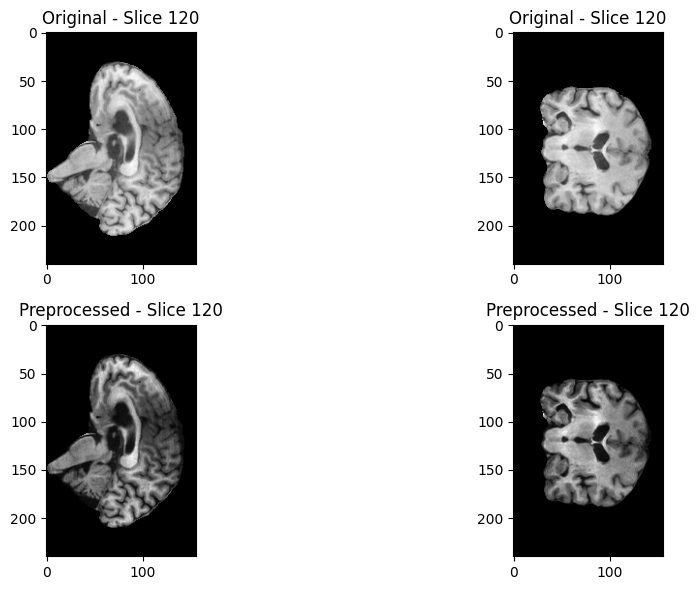

Processed: ./sample_img/BraTS2021_00621_t1.nii.gz


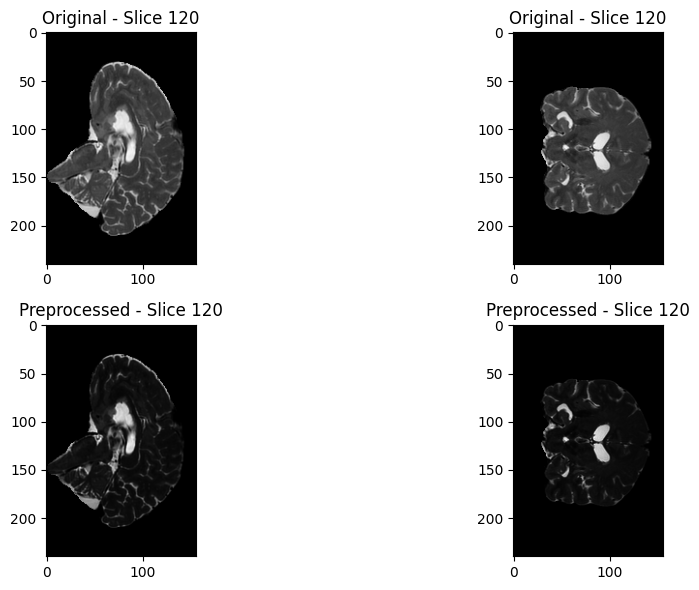

Processed: ./sample_img/BraTS2021_00621_t2.nii.gz


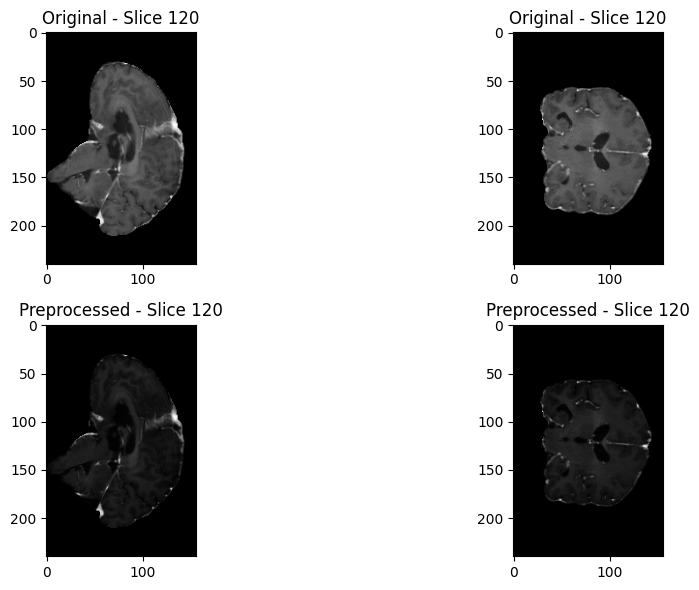

Processed: ./sample_img/BraTS2021_00621_t1ce.nii.gz


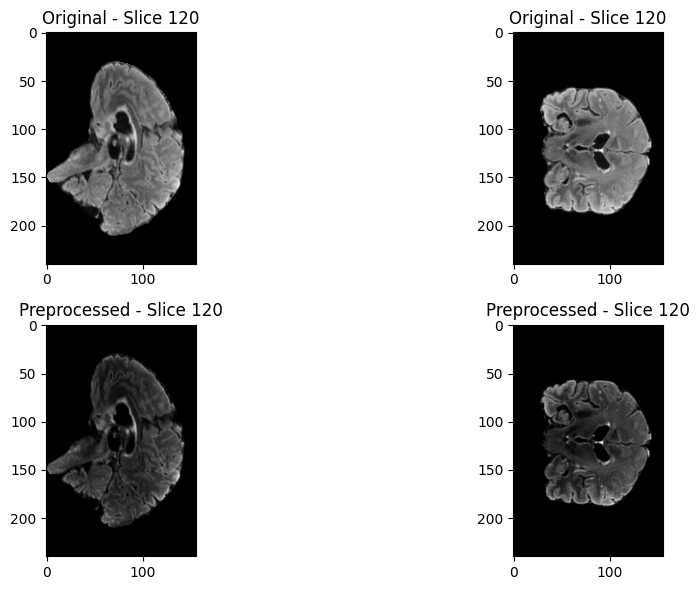

Processed: ./sample_img/BraTS2021_00621_flair.nii.gz


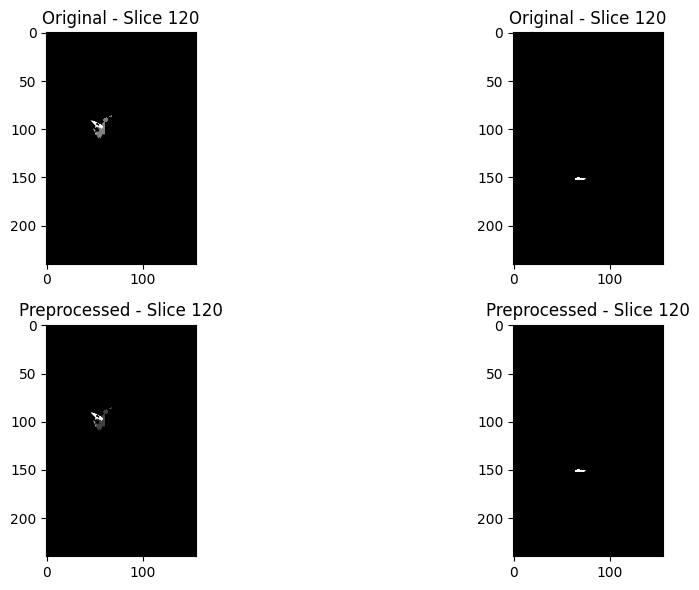

Processed: ./sample_img/BraTS2021_00621_seg.nii.gz


In [11]:
import os
import nibabel as nib
import numpy as np
from skimage import exposure
import matplotlib.pyplot as plt

def preprocess_nifti(img, brightness_factor= 2):
    data = img.get_fdata()

    # Brightness adjustment
    data_adjusted = exposure.adjust_gamma(data, gamma=brightness_factor)

    img_preprocessed = nib.Nifti1Image(data_adjusted, img.affine)
    return img_preprocessed
def show_slices(data_before, data_after):
    # Display slices from the original and preprocessed data
    slice_index = data_before.shape[0] // 2  # Adjust as needed

    plt.figure(figsize=(12, 6))

    plt.subplot(2, 2, 1)
    plt.imshow(data_before[slice_index, :, :], cmap='gray')
    plt.title('Original - Slice {}'.format(slice_index))

    plt.subplot(2, 2, 2)
    plt.imshow(data_before[:, slice_index, :], cmap='gray')
    plt.title('Original - Slice {}'.format(slice_index))

    plt.subplot(2, 2, 3)
    plt.imshow(data_after[slice_index, :, :], cmap='gray')
    plt.title('Preprocessed - Slice {}'.format(slice_index))

    plt.subplot(2, 2, 4)
    plt.imshow(data_after[:, slice_index, :], cmap='gray')
    plt.title('Preprocessed - Slice {}'.format(slice_index))
    plt.tight_layout()
    plt.show()

# Path to the folder containing the NIfTI files
data_folder = './sample_img/'

# Output folder for preprocessed data
output_folder = './preprocessed_data/'

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Process each file in the data folder
for root, dirs, files in os.walk(data_folder):
    for file in files:
        file_path = os.path.join(root, file)
        if file_path.endswith('.nii') or file_path.endswith('.nii.gz'):
            try:
                # Load the NIfTI image
                img = nib.load(file_path)

                # Extract the data before preprocessing
                data_before = img.get_fdata()

                # Preprocess the image (brightness adjustment only)
                img_preprocessed = preprocess_nifti(img)

                # Extract the data after preprocessing
                data_after = img_preprocessed.get_fdata()

                # Show slices
                show_slices(data_before, data_after)

                # Save the preprocessed image
                output_path = os.path.join(output_folder, file)
                nib.save(img_preprocessed, output_path)

                print(f"Processed: {file_path}")
            except Exception as e:
                print(f"Error processing {file_path}: {str(e)}")

Text(0.5, 1.0, 'Mask')

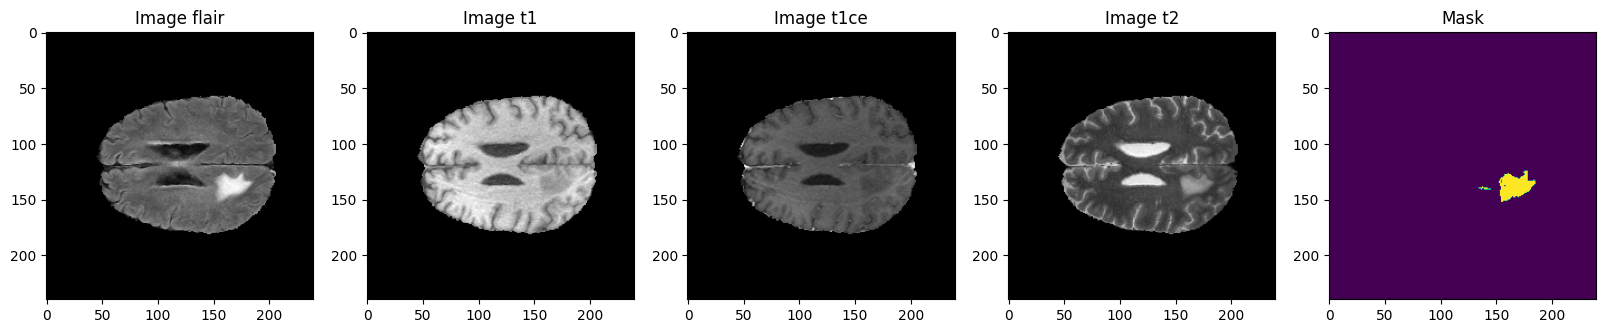

In [12]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (20, 10))
slice_w = 25
ax1.imshow(test_image_flair[:,:,test_image_flair.shape[0]//2-slice_w], cmap = 'gray')
ax1.set_title('Image flair')
ax2.imshow(test_image_t1[:,:,test_image_t1.shape[0]//2-slice_w], cmap = 'gray')
ax2.set_title('Image t1')
ax3.imshow(test_image_t1ce[:,:,test_image_t1ce.shape[0]//2-slice_w], cmap = 'gray')
ax3.set_title('Image t1ce')
ax4.imshow(test_image_t2[:,:,test_image_t2.shape[0]//2-slice_w], cmap = 'gray')
ax4.set_title('Image t2')
ax5.imshow(test_mask[:,:,test_mask.shape[0]//2-slice_w])
ax5.set_title('Mask')

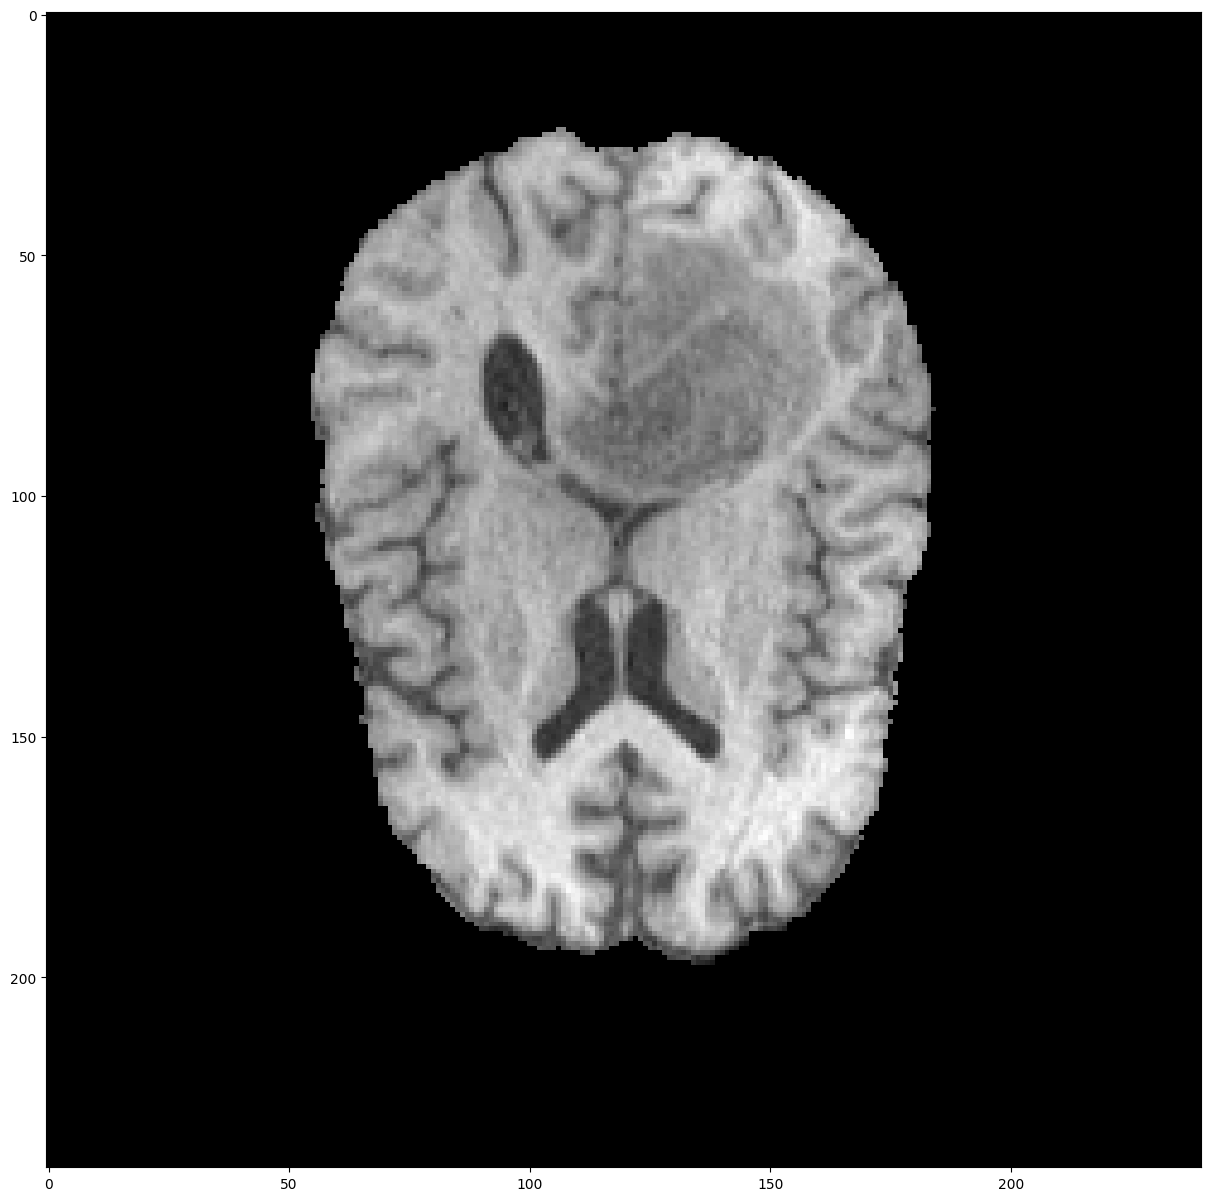

In [13]:
from skimage.transform import rotate, resize
from skimage.util import montage
import matplotlib.pyplot as plt

# Assuming test_image_t1 is a 3D volume
# Select a slice for display
slice_index = test_image_t1.shape[2] // 2

# Rotate and resize the image
rotated_resized_image = resize(rotate(test_image_t1[:,:,slice_index], angle=90), (test_image_t1.shape[0], test_image_t1.shape[1]))

# Display the rotated and resized image
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(rotated_resized_image, cmap='gray')
plt.show()

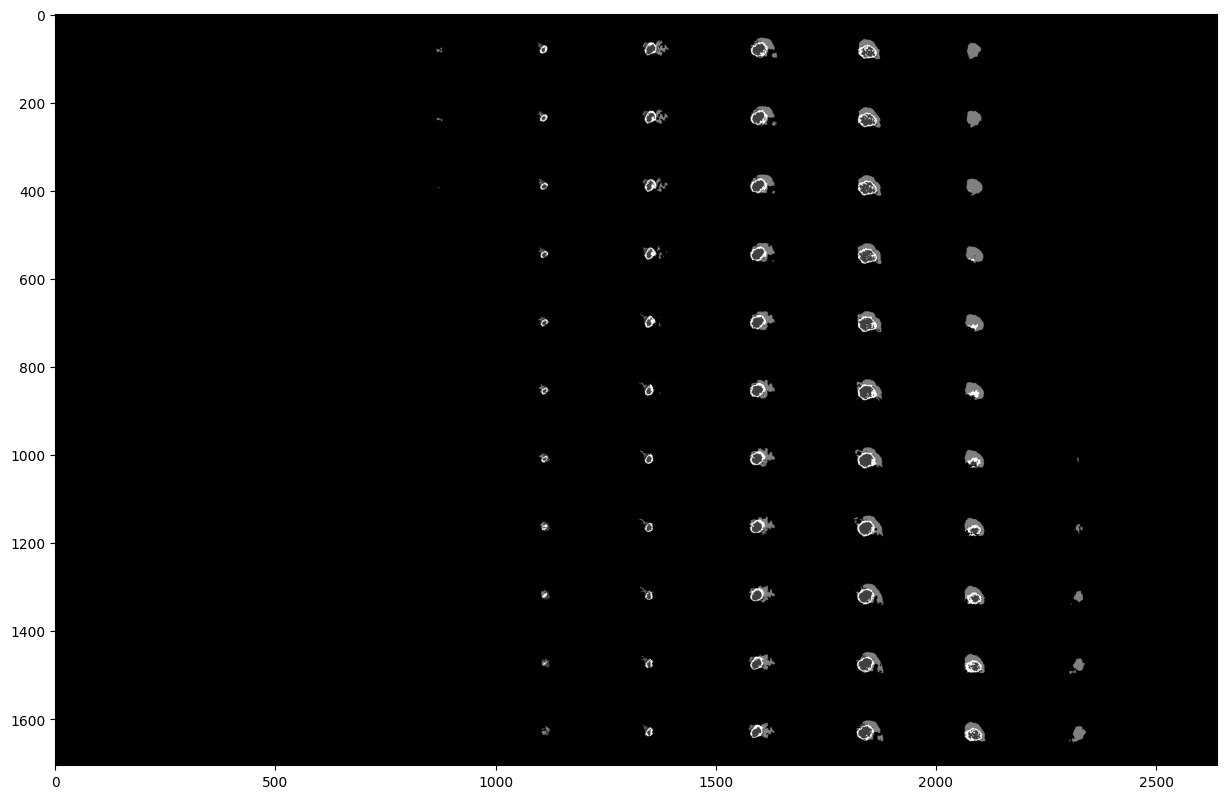

In [14]:
fig, ax1 = plt.subplots(1, 1, figsize = (15,15))
ax1.imshow(rotate(montage(test_mask[60:-60,:,:]), 90, resize=True), cmap ='gray')

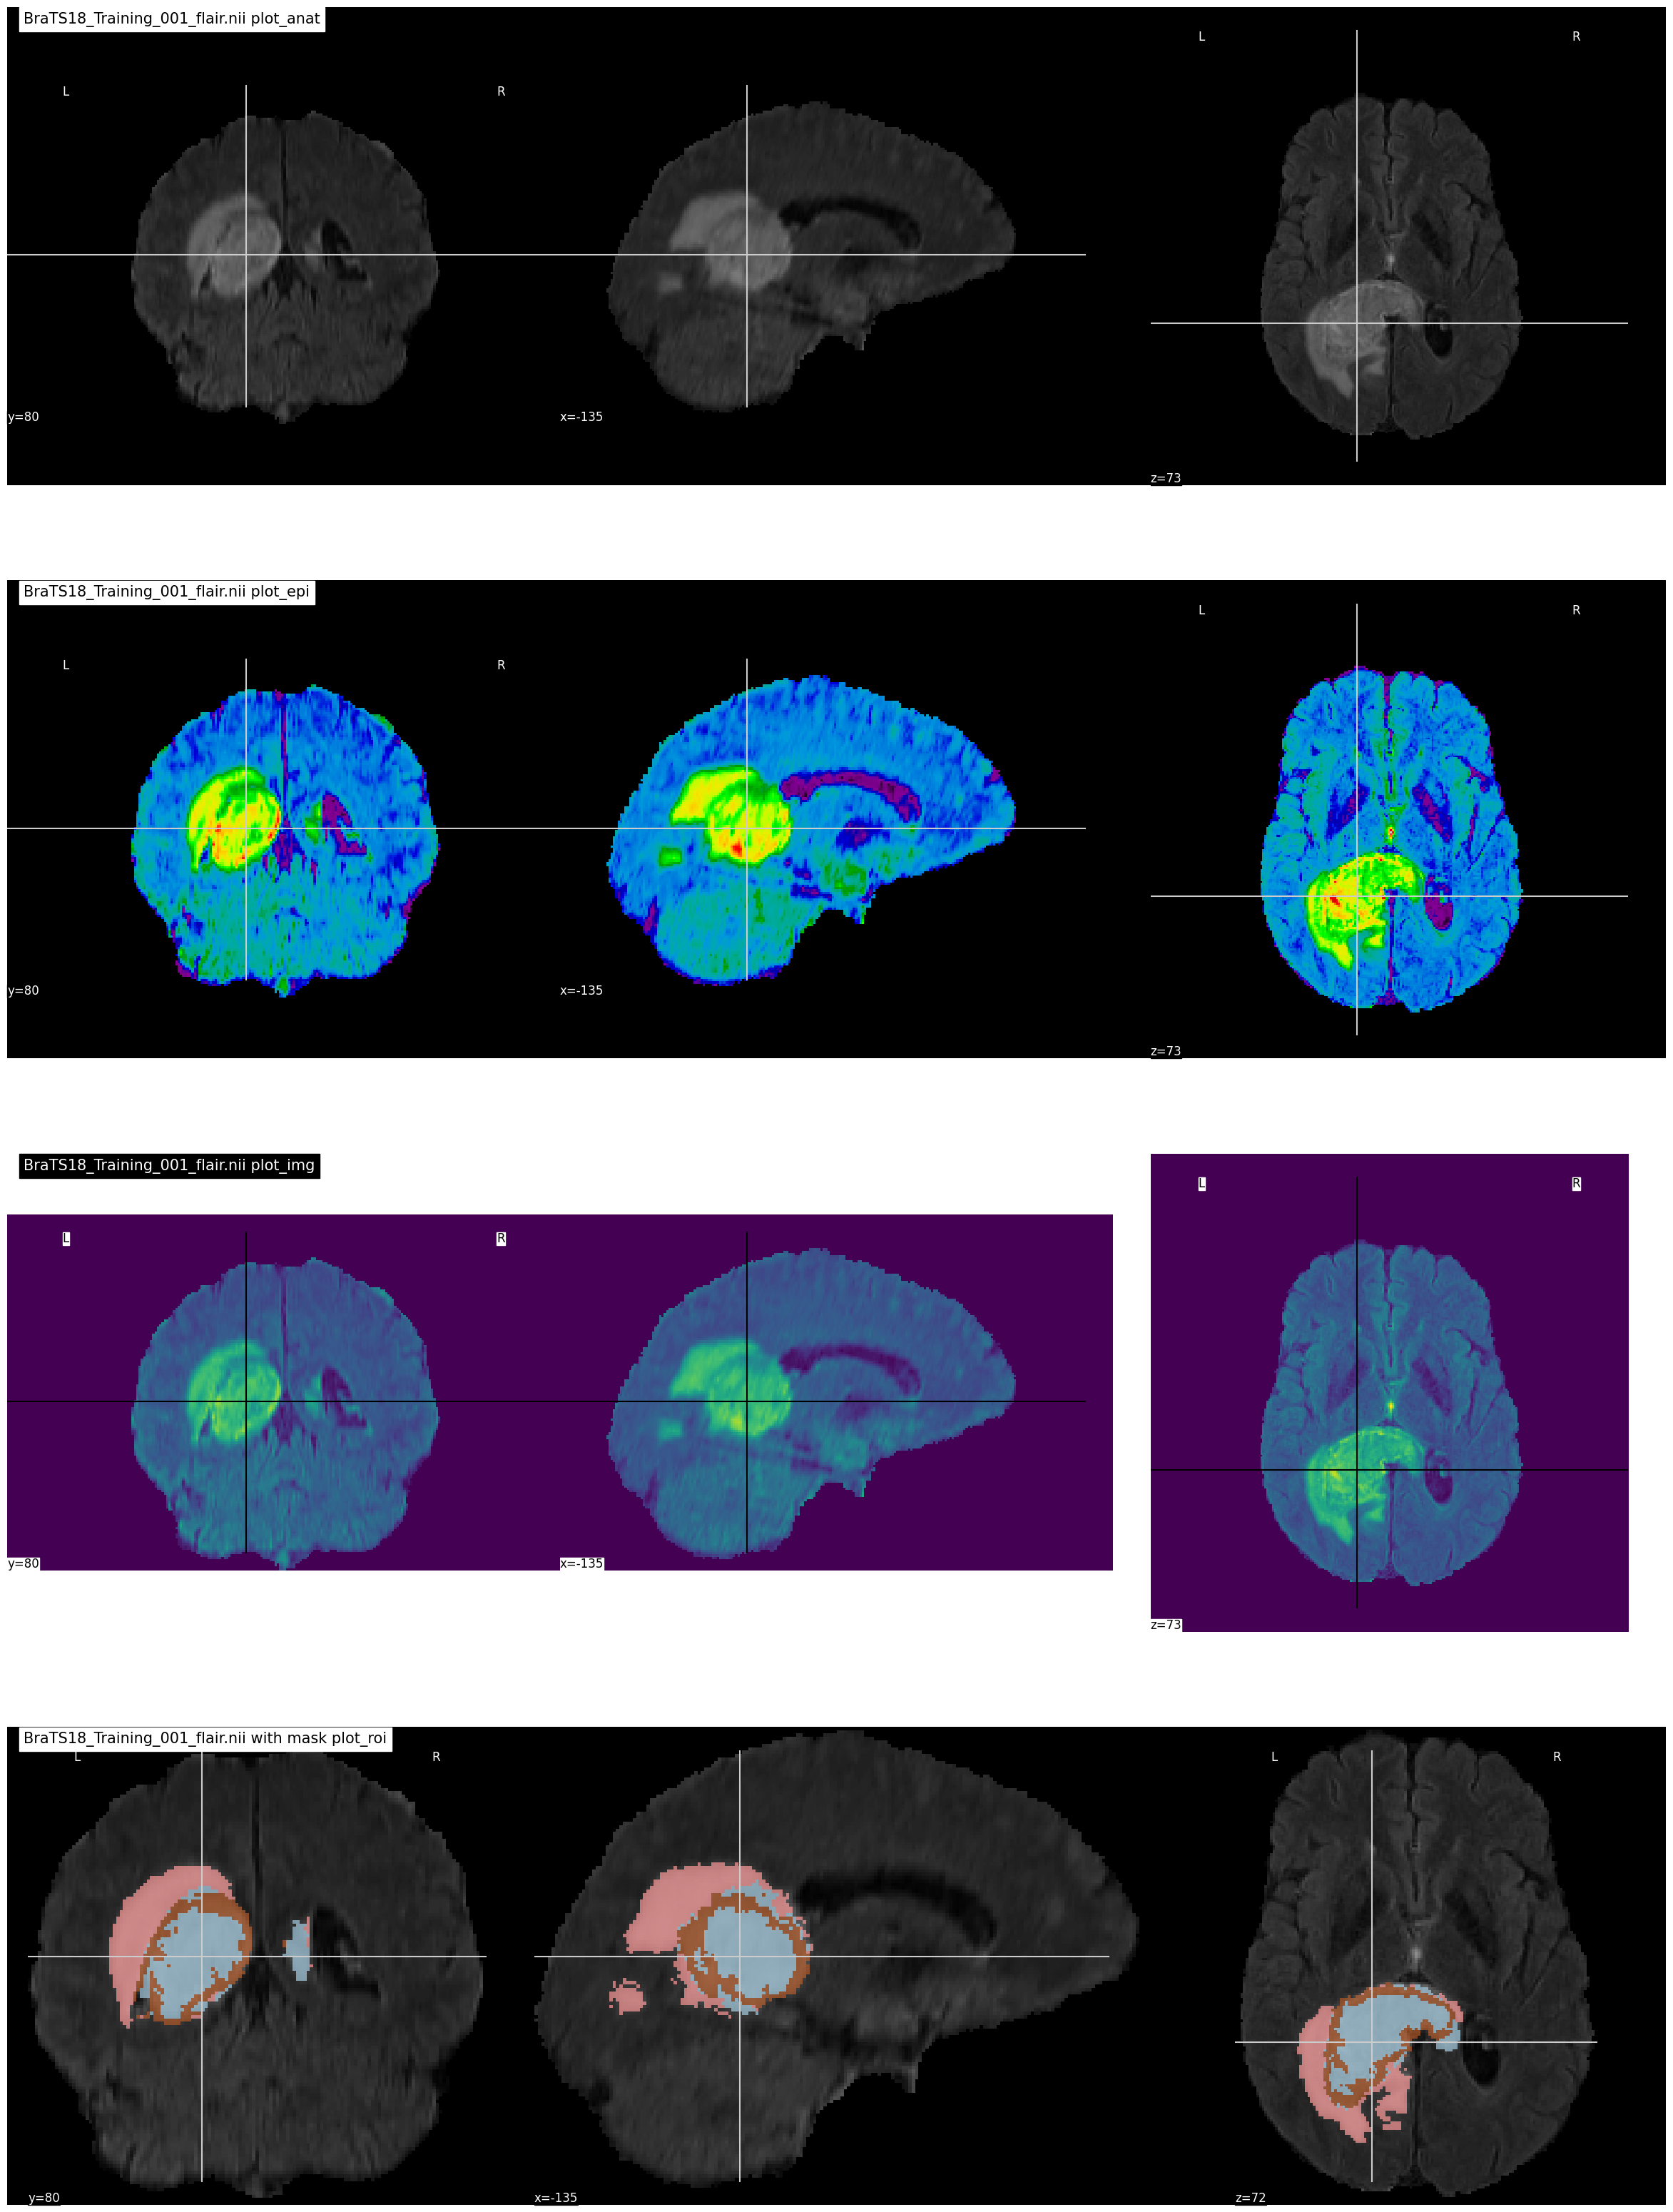

In [15]:
import nilearn as nl
import nibabel as nib
import nilearn.plotting as nlplt

#Loading the images 
niimg = nl.image.load_img(TRAIN_DATASET_PATH + 'BraTS2021_01261/BraTS2021_01261_flair.nii.gz')
nimask = nl.image.load_img(TRAIN_DATASET_PATH + 'BraTS2021_01261/BraTS2021_01261_seg.nii.gz')

fig, axes = plt.subplots(nrows=4, figsize=(30, 40))

nlplt.plot_anat(niimg,
                title='BraTS18_Training_001_flair.nii plot_anat',
                axes=axes[0])

nlplt.plot_epi(niimg,
               title='BraTS18_Training_001_flair.nii plot_epi',
               axes=axes[1])

nlplt.plot_img(niimg,
               title='BraTS18_Training_001_flair.nii plot_img',
               axes=axes[2])

nlplt.plot_roi(nimask, 
               title='BraTS18_Training_001_flair.nii with mask plot_roi',
               bg_img=niimg, 
               axes=axes[3], cmap='Paired')

plt.show()


In [16]:
# dice loss as defined above for 4 classes
def dice_coef(y_true, y_pred, smooth=1.0):
    class_num = 4
    for i in range(class_num):
        y_true_f = K.flatten(y_true[:,:,:,i])
        y_pred_f = K.flatten(y_pred[:,:,:,i])
        intersection = K.sum(y_true_f * y_pred_f)
        loss = ((2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth))
   #     K.print_tensor(loss, message='loss value for class {} : '.format(SEGMENT_CLASSES[i]))
        if i == 0:
            total_loss = loss
        else:
            total_loss = total_loss + loss
            
    total_loss = total_loss / class_num
#    K.print_tensor(total_loss, message=' total dice coef: ')
    return total_loss

# These functions are used for evaluating the performance of a segmentation model on three different classes
# in medical imaging (presumably related to brain tumor segmentation).
# Input Parameters:
# y_true: The ground truth segmentation mask for the edema class.
# y_pred: The predicted segmentation mask for the edema class.
# epsilon: A small constant to avoid division by zero.

def dice_coef_necrotic(y_true, y_pred, epsilon=1e-6):
    intersection = K.sum(K.abs(y_true[:,:,:,1] * y_pred[:,:,:,1]))
    return (2. * intersection) / (K.sum(K.square(y_true[:,:,:,1])) + K.sum(K.square(y_pred[:,:,:,1])) + epsilon)

def dice_coef_edema(y_true, y_pred, epsilon=1e-6):
    intersection = K.sum(K.abs(y_true[:,:,:,2] * y_pred[:,:,:,2]))
    return (2. * intersection) / (K.sum(K.square(y_true[:,:,:,2])) + K.sum(K.square(y_pred[:,:,:,2])) + epsilon)

def dice_coef_enhancing(y_true, y_pred, epsilon=1e-6):
    intersection = K.sum(K.abs(y_true[:,:,:,3] * y_pred[:,:,:,3]))
    return (2. * intersection) / (K.sum(K.square(y_true[:,:,:,3])) + K.sum(K.square(y_pred[:,:,:,3])) + epsilon)

# Computing Precision 
def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision

    
# Computing Sensitivity      
def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())


# Computing Specificity
def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

In [17]:
from sklearn.model_selection import train_test_split

# lists of directories with studies
train_and_val_directories = [f.path for f in os.scandir(TRAIN_DATASET_PATH) if f.is_dir()]

# file BraTS20_Training_355 has ill formatted name for for seg.nii file
#train_and_val_directories.remove(TRAIN_DATASET_PATH+'BraTS20_Training_355')


def pathListIntoIds(dirList):
    x = []
    for i in range(0,len(dirList)):
        x.append(dirList[i][dirList[i].rfind('/')+1:])
    return x

train_and_test_ids = pathListIntoIds(train_and_val_directories); 

    
train_test_ids, val_ids = train_test_split(train_and_test_ids,test_size=0.2) 
train_ids, test_ids = train_test_split(train_test_ids,test_size=0.15)

In [18]:
train_and_test_ids[4] 


'BraTS2021_01608'

In [19]:
train_ids[0]


'BraTS2021_01663'

In [20]:
test_ids[0]


'BraTS2021_01391'

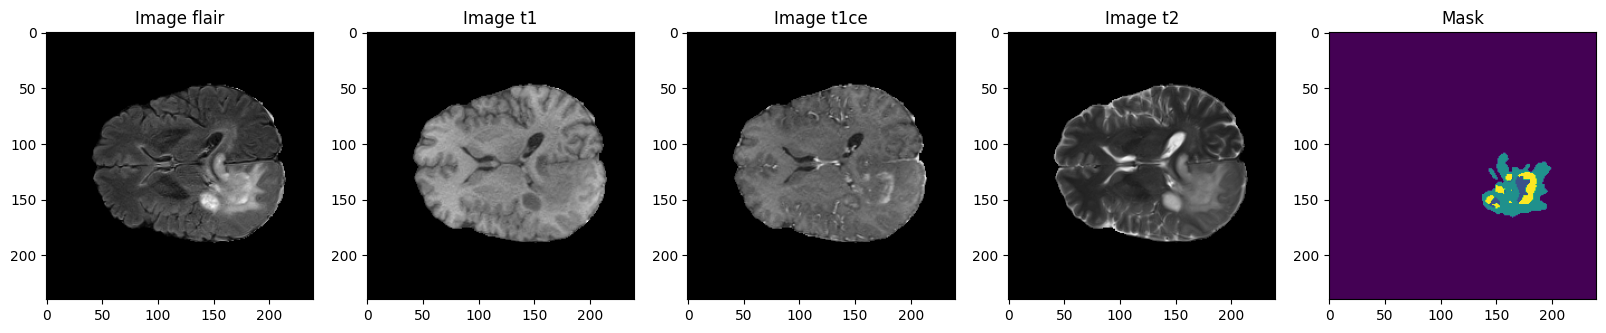

In [21]:
case_index = 0
case_name = test_ids[case_index]

test_image_flair = nib.load(os.path.join(TRAIN_DATASET_PATH, case_name, f'{case_name}_flair.nii.gz')).get_fdata()
test_image_t1 = nib.load(os.path.join(TRAIN_DATASET_PATH, case_name, f'{case_name}_t1.nii.gz')).get_fdata()
test_image_t1ce = nib.load(os.path.join(TRAIN_DATASET_PATH, case_name, f'{case_name}_t1ce.nii.gz')).get_fdata()
test_image_t2 = nib.load(os.path.join(TRAIN_DATASET_PATH, case_name, f'{case_name}_t2.nii.gz')).get_fdata()
test_mask = nib.load(os.path.join(TRAIN_DATASET_PATH, case_name, f'{case_name}_seg.nii.gz')).get_fdata()

fig, axes = plt.subplots(1, 5, figsize=(20, 5))
slice_w = test_image_flair.shape[2] // 2

axes[0].imshow(test_image_flair[:, :, slice_w], cmap='gray')
axes[0].set_title('Image flair')

axes[1].imshow(test_image_t1[:, :, slice_w], cmap='gray')
axes[1].set_title('Image t1')
axes[2].imshow(test_image_t1ce[:, :, slice_w], cmap='gray')
axes[2].set_title('Image t1ce')

axes[3].imshow(test_image_t2[:, :, slice_w], cmap='gray')
axes[3].set_title('Image t2')

axes[4].imshow(test_mask[:, :, slice_w])
axes[4].set_title('Mask')

plt.show()


In [22]:
import tensorflow as tf
IMG_SIZE=128

class DataGenerator(tf.keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, dim=(IMG_SIZE,IMG_SIZE), batch_size = 1, n_channels = 2, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        # Find list of IDs
        Batch_ids = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(Batch_ids)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, Batch_ids):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
 # Initialization
        X = np.zeros((self.batch_size*VOLUME_SLICES, *self.dim, self.n_channels))
        y = np.zeros((self.batch_size*VOLUME_SLICES, 240, 240))
        Y = np.zeros((self.batch_size*VOLUME_SLICES, *self.dim, 4))

        
        # Generate data
        for c, i in enumerate(Batch_ids):
            case_path = os.path.join(TRAIN_DATASET_PATH, i)

            data_path = os.path.join(case_path, f'{i}_flair.nii.gz');
            flair = nib.load(data_path).get_fdata()    

            data_path = os.path.join(case_path, f'{i}_t1ce.nii.gz');
            ce = nib.load(data_path).get_fdata()
            
            data_path = os.path.join(case_path, f'{i}_seg.nii.gz');
            seg = nib.load(data_path).get_fdata()
            for j in range(VOLUME_SLICES):
                X[j +VOLUME_SLICES*c,:,:,0] = cv2.resize(flair[:,:,j+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE));
                X[j +VOLUME_SLICES*c,:,:,1] = cv2.resize(ce[:,:,j+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE));

                y[j +VOLUME_SLICES*c] = seg[:,:,j+VOLUME_START_AT];
                    
        # Generate masks
        y[y==4] = 3;
        mask = tf.one_hot(y, 4);
        Y = tf.image.resize(mask, (IMG_SIZE, IMG_SIZE));
        return X/np.max(X), Y
        
training_generator = DataGenerator(train_ids)
valid_generator = DataGenerator(val_ids)
test_generator = DataGenerator(test_ids)

In [23]:
print(len(train_ids))
print(len(val_ids))
print(len(test_ids))

850
251
150


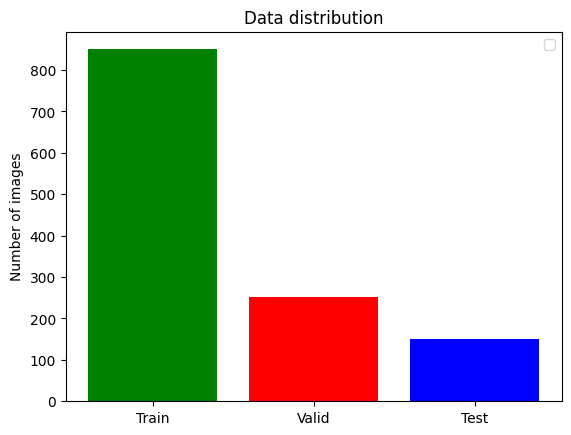

In [24]:
import matplotlib.pyplot as plt

def showDataLayout():
    plt.bar(["Train","Valid","Test"],
    [len(train_ids), len(val_ids), len(test_ids)], align='center',color=[ 'green','red', 'blue'])
    plt.legend()

    plt.ylabel('Number of images')
    plt.title('Data distribution')
    plt.savefig('data2018.png')
    plt.show()
    
showDataLayout()


In [25]:
from transformers import ResNetConfig, ResNetModel

configuration = ResNetConfig()

# Initializing a model (with random weights) from the resnet-50 style configuration
model = ResNetModel(configuration)

# Accessing the model configuration
configuration = model.config

print(model)

ResNetModel(
  (embedder): ResNetEmbeddings(
    (embedder): ResNetConvLayer(
      (convolution): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (normalization): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (activation): ReLU()
    )
    (pooler): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (encoder): ResNetEncoder(
    (stages): ModuleList(
      (0): ResNetStage(
        (layers): Sequential(
          (0): ResNetBottleNeckLayer(
            (shortcut): ResNetShortCut(
              (convolution): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (normalization): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            )
            (layer): Sequential(
              (0): ResNetConvLayer(
                (convolution): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
                (normalizatio

In [26]:
def imageLoader(path):
    image = nib.load(path).get_fdata()
    X = np.zeros((self.batch_size*VOLUME_SLICES, *self.dim, self.n_channels))
    for j in range(VOLUME_SLICES):
        X[j +VOLUME_SLICES*c,:,:,0] = cv2.resize(image[:,:,j+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE));
        X[j +VOLUME_SLICES*c,:,:,1] = cv2.resize(ce[:,:,j+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE));

        y[j +VOLUME_SLICES*c] = seg[:,:,j+VOLUME_START_AT];
    return np.array(image)
def loadDataFromDir(path, list_of_files, mriType, n_images):
    scans = []
    masks = []
    for i in list_of_files[:n_images]:
        fullPath = glob.glob( i + '/*'+ mriType +'*')[0]
        currentScanVolume = imageLoader(fullPath)
        currentMaskVolume = imageLoader( glob.glob( i + '/*seg*')[0] ) 
        # for each slice in 3D volume, find also it's mask
        for j in range(0, currentScanVolume.shape[2]):
            scan_img = cv2.resize(currentScanVolume[:,:,j], dsize=(IMG_SIZE,IMG_SIZE), interpolation=cv2.INTER_AREA).astype('uint8')
            mask_img = cv2.resize(currentMaskVolume[:,:,j], dsize=(IMG_SIZE,IMG_SIZE), interpolation=cv2.INTER_AREA).astype('uint8')
            scans.append(scan_img[..., np.newaxis])
            masks.append(mask_img[..., np.newaxis])
    return np.array(scans, dtype='float32'), np.array(masks, dtype='float32')
        
#brains_list_test, masks_list_test = loadDataFromDir(VALIDATION_DATASET_PATH, test_directories, "flair", 5)


In [27]:
import os

# Assuming TRAIN_DATASET_PATH is the path to your dataset directory
dataset_path = TRAIN_DATASET_PATH

# Get a list of files in the dataset directory
files = os.listdir(dataset_path)

# Extract case names from filenames
case_names = [file.split('_')[1] for file in files if 'flair.nii' in file]

# Print the case names
for case in case_names:
    print(case)

In [28]:
def showPredictsByCaseName(case_name, start_slice=60):
    path = os.path.join(TRAIN_DATASET_PATH, case_name)

    # Construct file paths
    seg_path = os.path.join(path, f'{case_name}_seg.nii.gz')
    flair_path = os.path.join(path, f'{case_name}_flair.nii.gz')

    # Print file paths
    print(f'Segmentation path: {seg_path}')
    print(f'Flair image path: {flair_path}')

    # Check if the segmentation file exists
    if not os.path.exists(seg_path):
        print(f"Segmentation file not found for case {case_name}")
        # Print the contents of the directory
        print(f"Contents of {path}: {os.listdir(path)}")
        return  # This 'return' is part of the function
    try:
        # Load segmentation ground truth
        gt = nib.load(seg_path).get_fdata()
    except FileNotFoundError:
        print(f"Error: Segmentation file not found for case {case_name}")
        return  # This 'return' is part of the function

    try:
        # Load original image
        origImage = nib.load(flair_path).get_fdata()
    except FileNotFoundError:
        print(f"Error: Original image file not found for case {case_name}")
        return  # This 'return' is part of the function

    # The rest of your code for prediction and visualization

# Example usage for case 'BraTS2021_00131'
showPredictsByCaseName(case_name='BraTS2021_00131')

Segmentation path: ./BraTS2021_Training_Data/BraTS2021_00131/BraTS2021_00131_seg.nii.gz
Flair image path: ./BraTS2021_Training_Data/BraTS2021_00131/BraTS2021_00131_flair.nii.gz


In [29]:
def showPredictsByCaseName(case_name, start_slice=60):
    path = os.path.join(TRAIN_DATASET_PATH, case_name)

    # Construct file paths
    seg_path = os.path.join(path, f'{case_name}_seg.nii.gz')  # Corrected file extension
    flair_path = os.path.join(path, f'{case_name}_flair.nii')

    # Print file paths
    print(f'Segmentation path: {seg_path}')
    print(f'Flair image path: {flair_path}')

    # Check if the segmentation file exists
    if not os.path.exists(seg_path):
        print(f"Segmentation file not found for case {case_name}")
        # Print the contents of the directory
        print(f"Contents of {path}: {os.listdir(path)}")
        return
    try:
        # Load segmentation ground truth
        gt = nib.load(seg_path).get_fdata()
    except FileNotFoundError:
        print(f"Error: Segmentation file not found for case {case_name}")
        return

    try:
        # Load original image
        origImage = nib.load(flair_path).get_fdata()
    except FileNotFoundError:
        print(f"Error: Original image file not found for case {case_name}")
        return

    # Your existing code for prediction
    p = predictByPath(path, case_name)
    core = p[:, :, :, 1]
    edema = p[:, :, :, 2]
    enhancing = p[:, :, :, 3]

    # Display images
    plt.figure(figsize=(18, 50))
    f, axarr = plt.subplots(1, 7, figsize=(18, 50))

    for i in range(6):
        axarr[i].imshow(cv2.resize(origImage[:, :, start_slice + VOLUME_START_AT], (IMG_SIZE, IMG_SIZE)),
                        cmap="gray", interpolation='none')

    axarr[0].imshow(cv2.resize(origImage[:, :, start_slice + VOLUME_START_AT], (IMG_SIZE, IMG_SIZE)), cmap="gray")
    axarr[0].set_title('Original image flair')

    curr_gt = cv2.resize(gt[:, :, start_slice + VOLUME_START_AT], (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_NEAREST)
    axarr[1].imshow(curr_gt, cmap="Reds", interpolation='none', alpha=0.3)
    axarr[1].set_title('Ground truth')

    axarr[2].imshow(p[start_slice, :, :, 1:4], cmap="Reds", interpolation='none', alpha=0.3)
    axarr[2].set_title('All classes')

    axarr[3].imshow(edema[start_slice, :, :], cmap="OrRd", interpolation='none', alpha=0.3)
    axarr[3].set_title(f'{SEGMENT_CLASSES[1]} predicted')

    axarr[4].imshow(core[start_slice, :, :], cmap="OrRd", interpolation='none', alpha=0.3)
    axarr[4].set_title(f'{SEGMENT_CLASSES[2]} predicted')

    axarr[5].imshow(enhancing[start_slice, :, :], cmap="OrRd", interpolation='none', alpha=0.3)
    axarr[5].set_title(f'{SEGMENT_CLASSES[3]} predicted')

    # Display the predicted mask overlay on the original image
    axarr[6].imshow(cv2.resize(origImage[:, :, start_slice + VOLUME_START_AT], (IMG_SIZE, IMG_SIZE)),
                    cmap="gray", interpolation='none')
    axarr[6].imshow(p[start_slice, :, :, 1:4], cmap="Reds", interpolation='none', alpha=0.3)
    axarr[6].set_title('Overlay: Prediction on Original Image')

    plt.savefig(f'Test_{case_name}.png')

    plt.show()

# Example usage for case 'BraTS2021_00131'
showPredictsByCaseName(case_name='BraTS2021_00131')


Segmentation path: ./BraTS2021_Training_Data/BraTS2021_00131/BraTS2021_00131_seg.nii.gz
Flair image path: ./BraTS2021_Training_Data/BraTS2021_00131/BraTS2021_00131_flair.nii
Error: Original image file not found for case BraTS2021_00131


Flair image path: ./BraTS2021_Training_Data/BraTS2021_00124/BraTS2021_00124_flair.nii.gz


<Figure size 2500x5000 with 0 Axes>

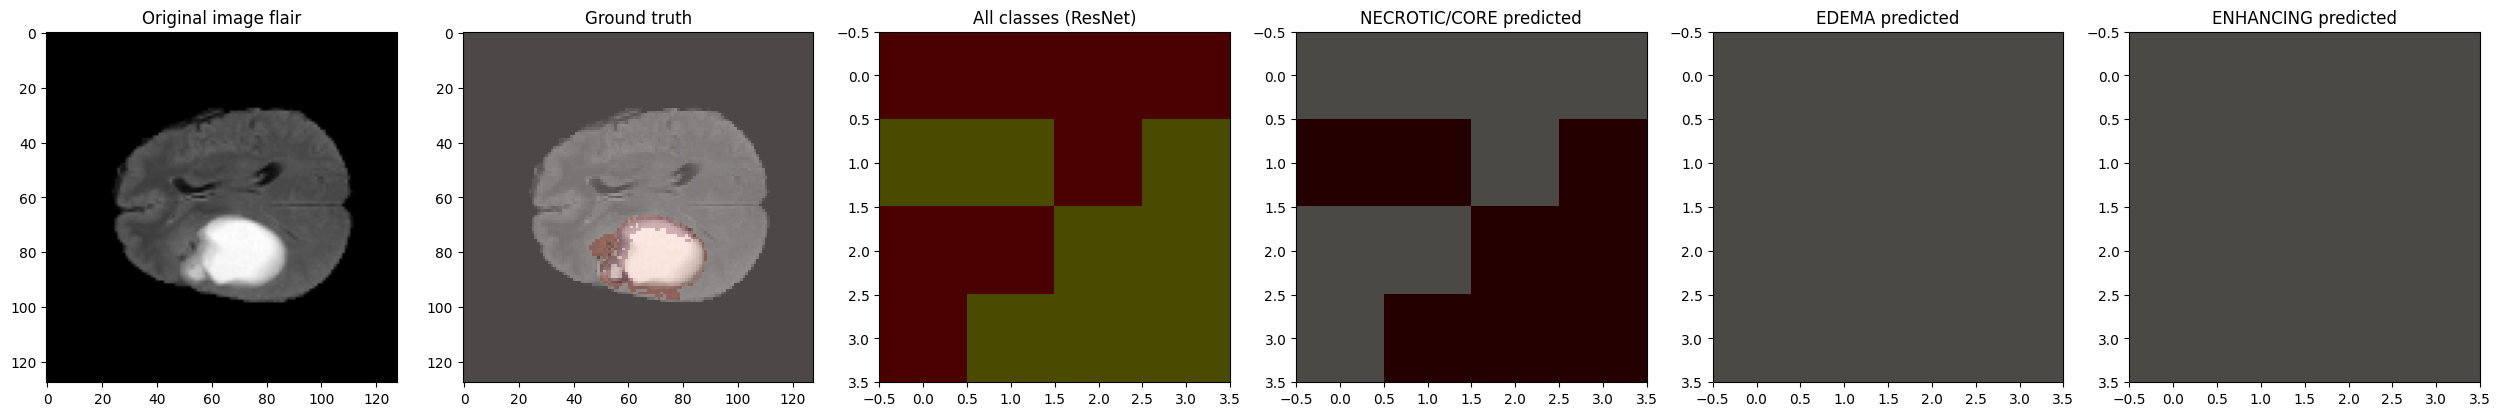

Flair image path: ./BraTS2021_Training_Data/BraTS2021_00054/BraTS2021_00054_flair.nii.gz


<Figure size 2500x5000 with 0 Axes>

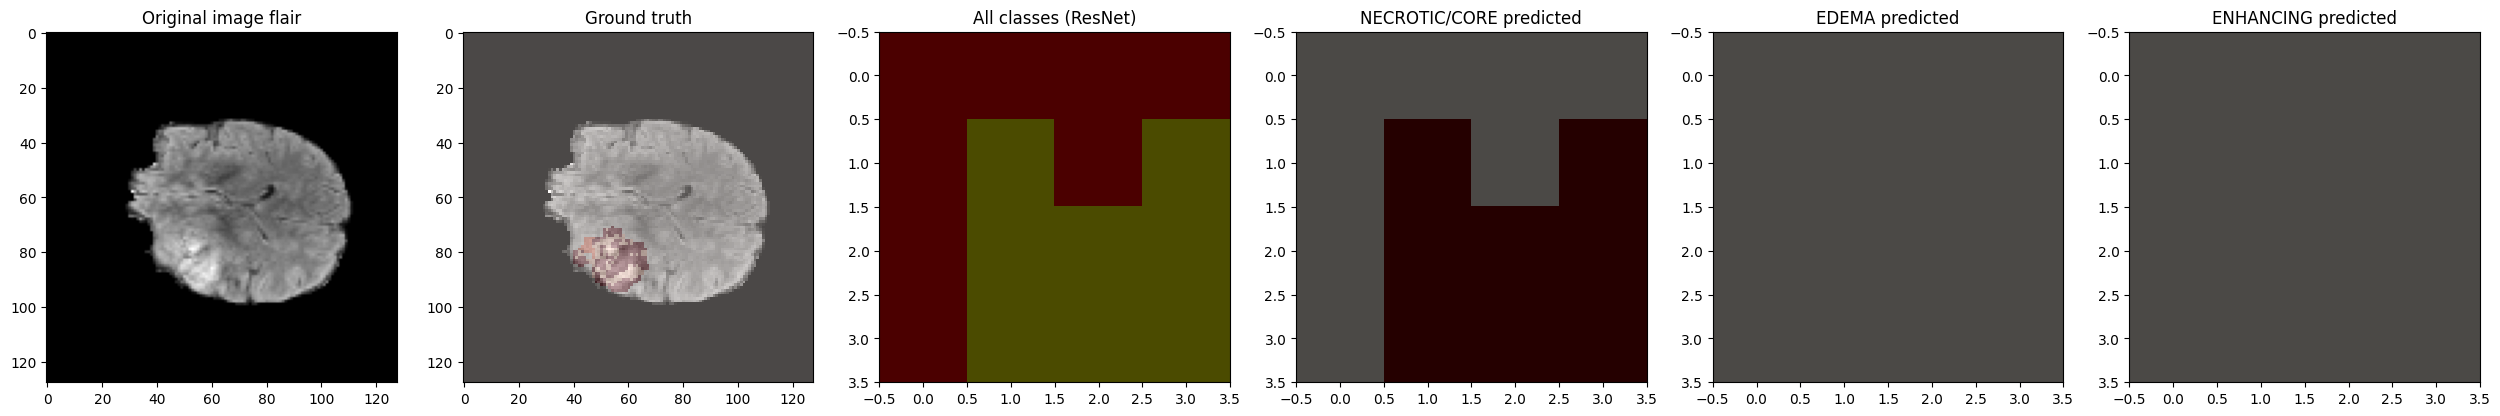

Flair image path: ./BraTS2021_Training_Data/BraTS2021_01172/BraTS2021_01172_flair.nii.gz


<Figure size 2500x5000 with 0 Axes>

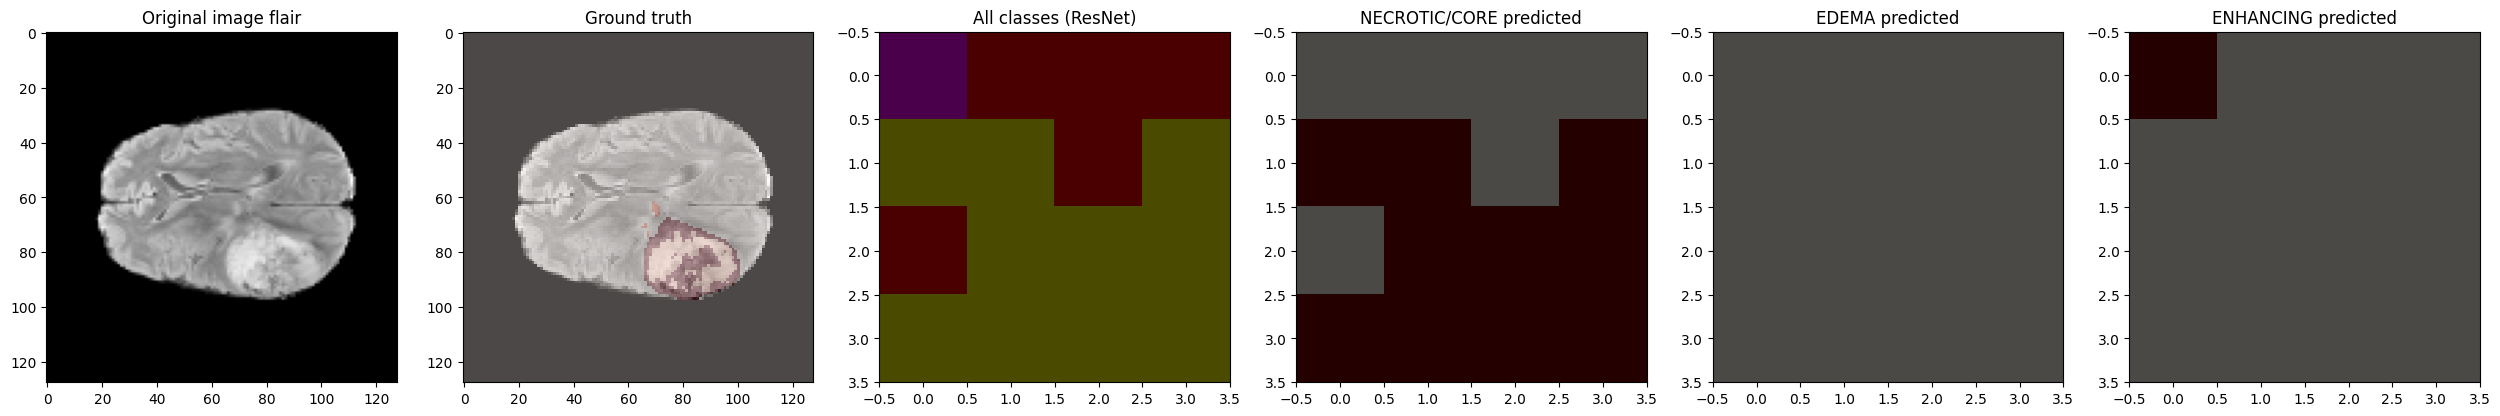

Flair image path: ./BraTS2021_Training_Data/BraTS2021_00191/BraTS2021_00191_flair.nii.gz


<Figure size 2500x5000 with 0 Axes>

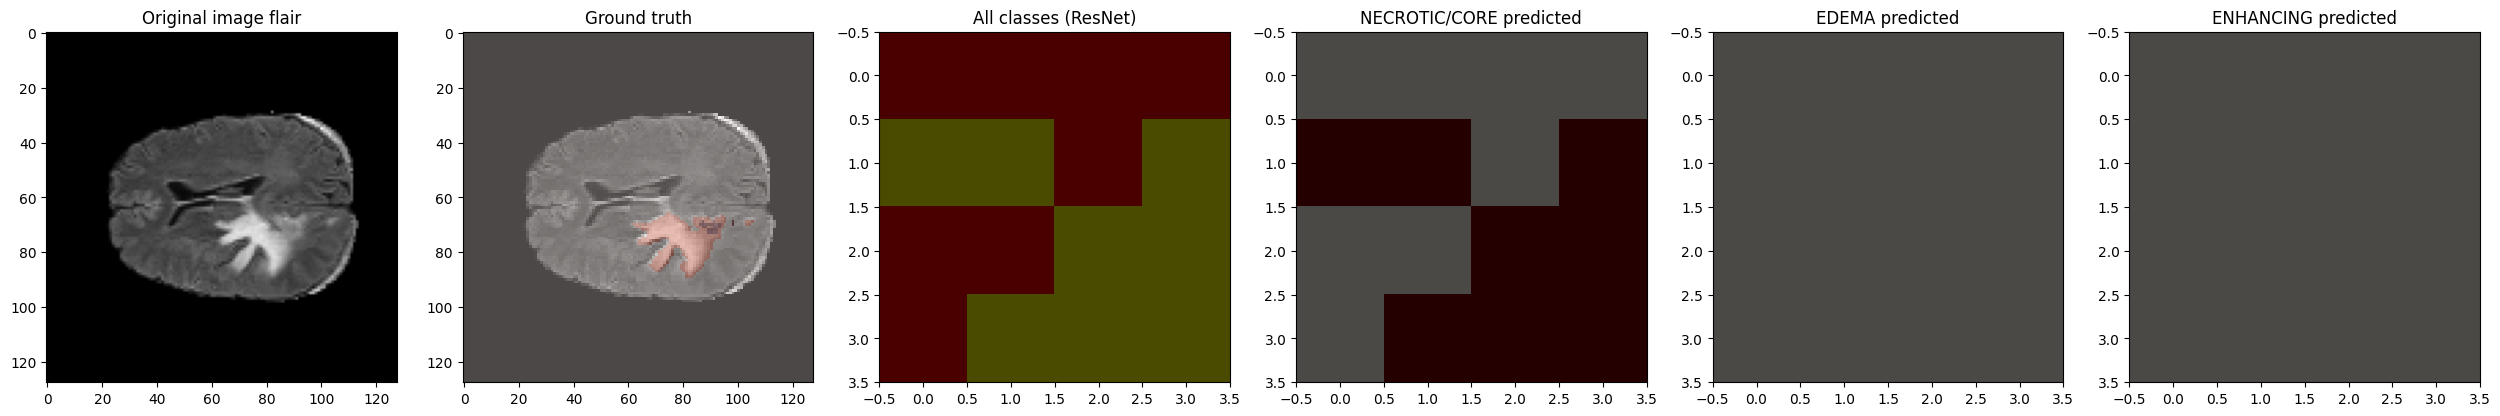

Flair image path: ./BraTS2021_Training_Data/BraTS2021_01342/BraTS2021_01342_flair.nii.gz


<Figure size 2500x5000 with 0 Axes>

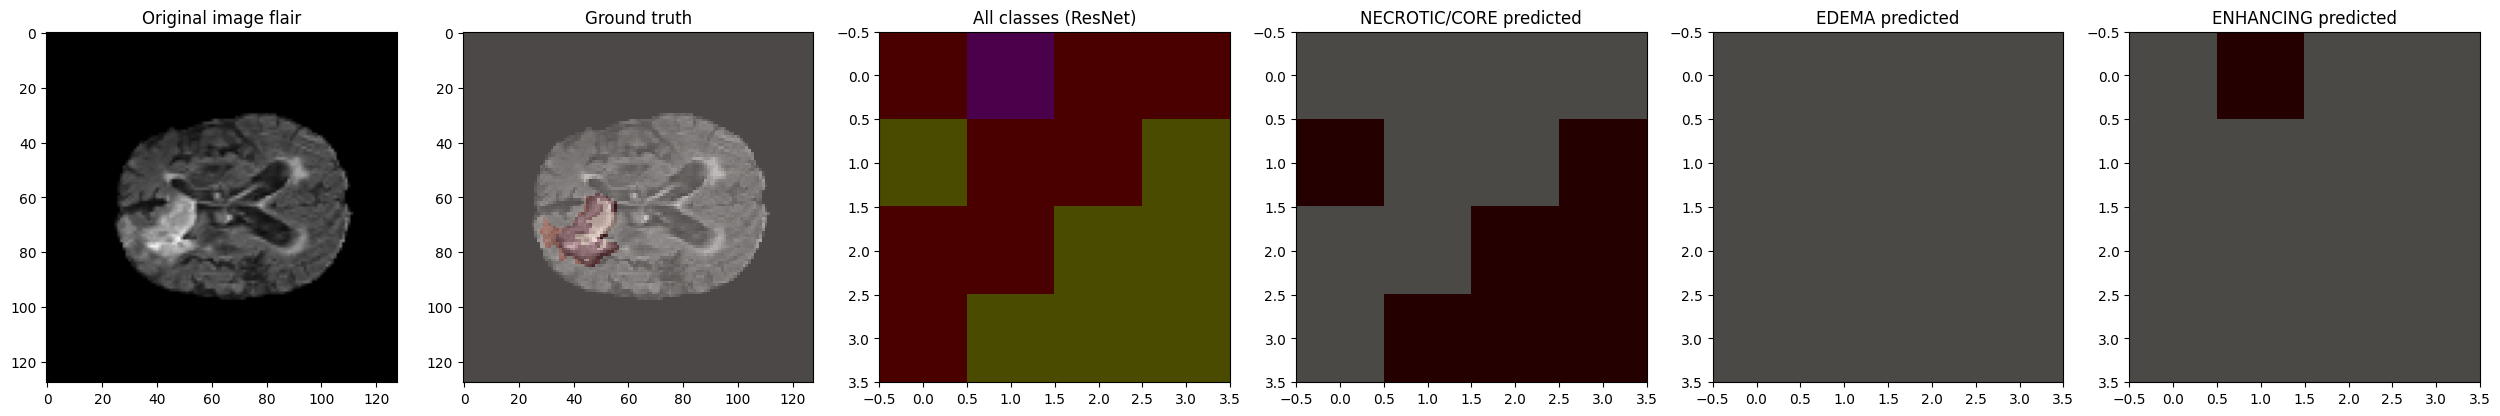

Flair image path: ./BraTS2021_Training_Data/BraTS2021_00097/BraTS2021_00097_flair.nii.gz


<Figure size 2500x5000 with 0 Axes>

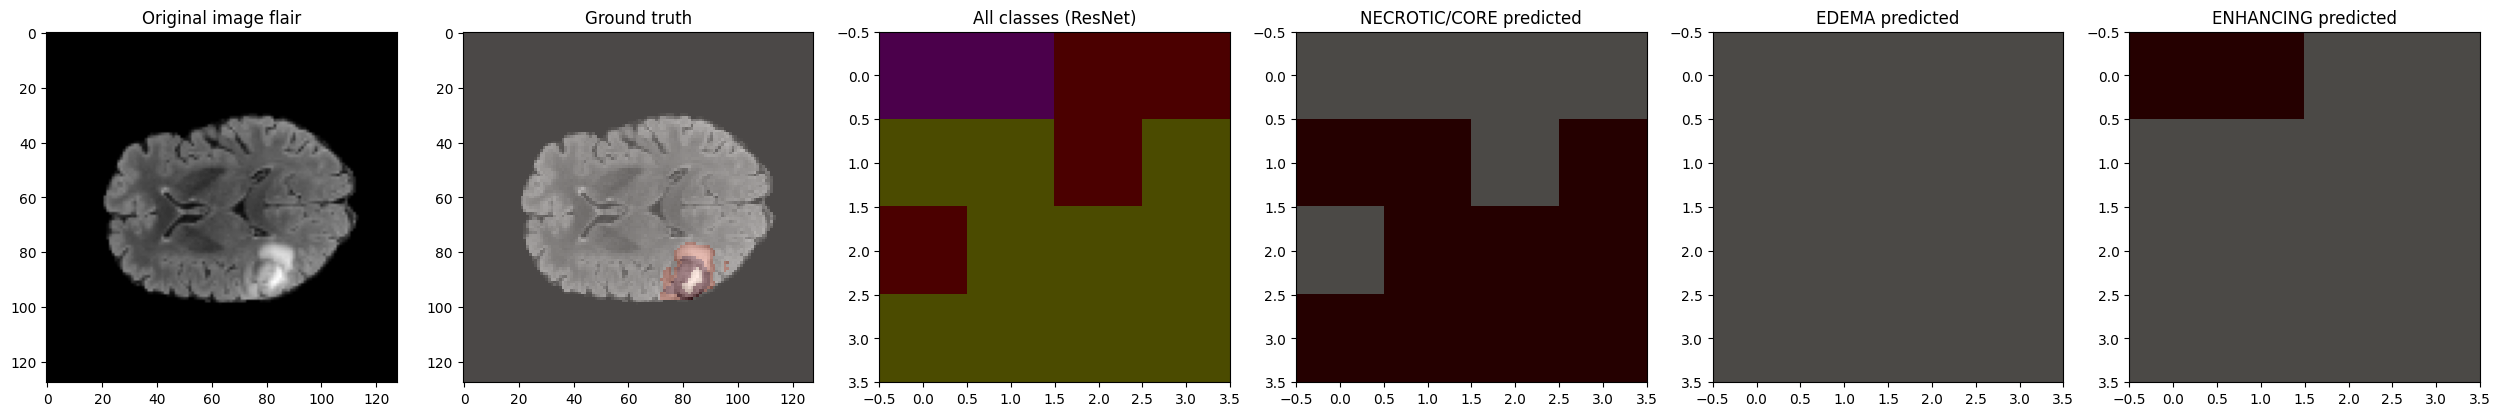

Flair image path: ./BraTS2021_Training_Data/BraTS2021_01625/BraTS2021_01625_flair.nii.gz


<Figure size 2500x5000 with 0 Axes>

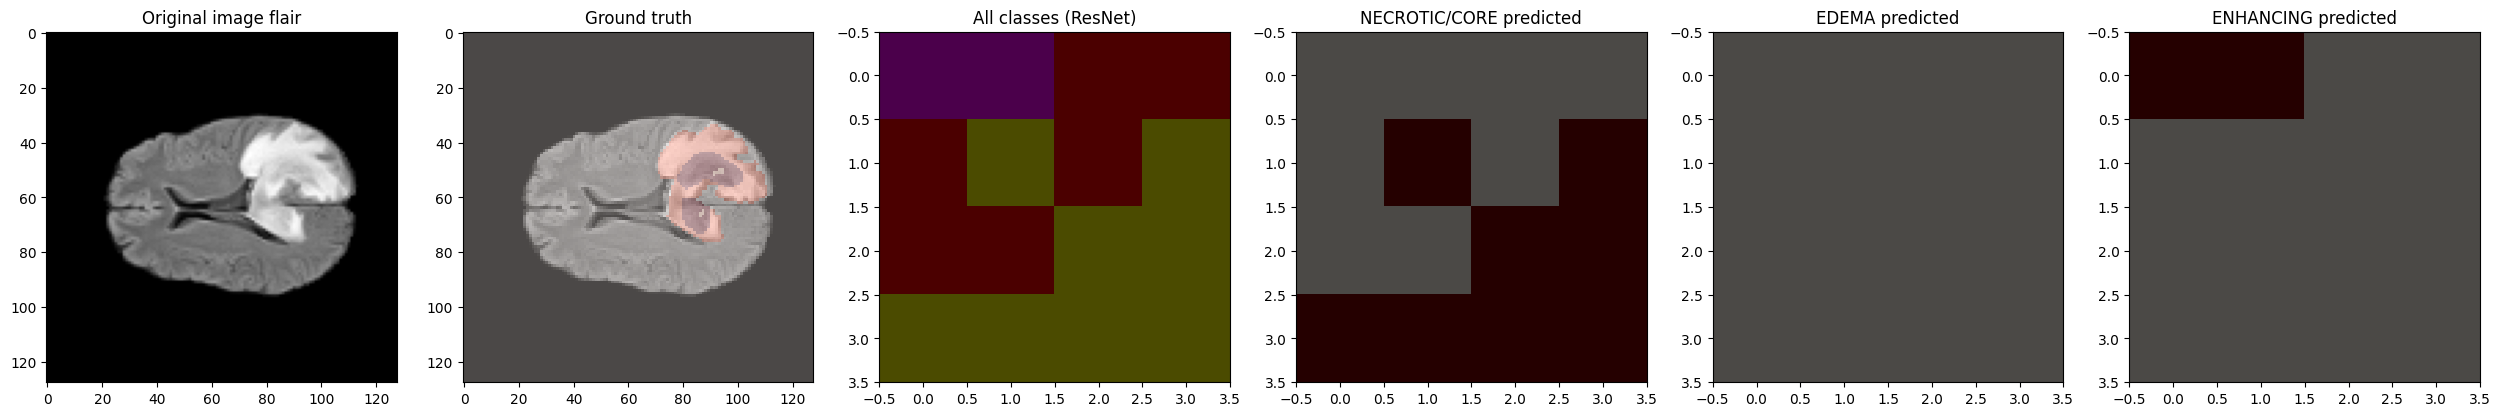

Flair image path: ./BraTS2021_Training_Data/BraTS2021_00451/BraTS2021_00451_flair.nii.gz


<Figure size 2500x5000 with 0 Axes>

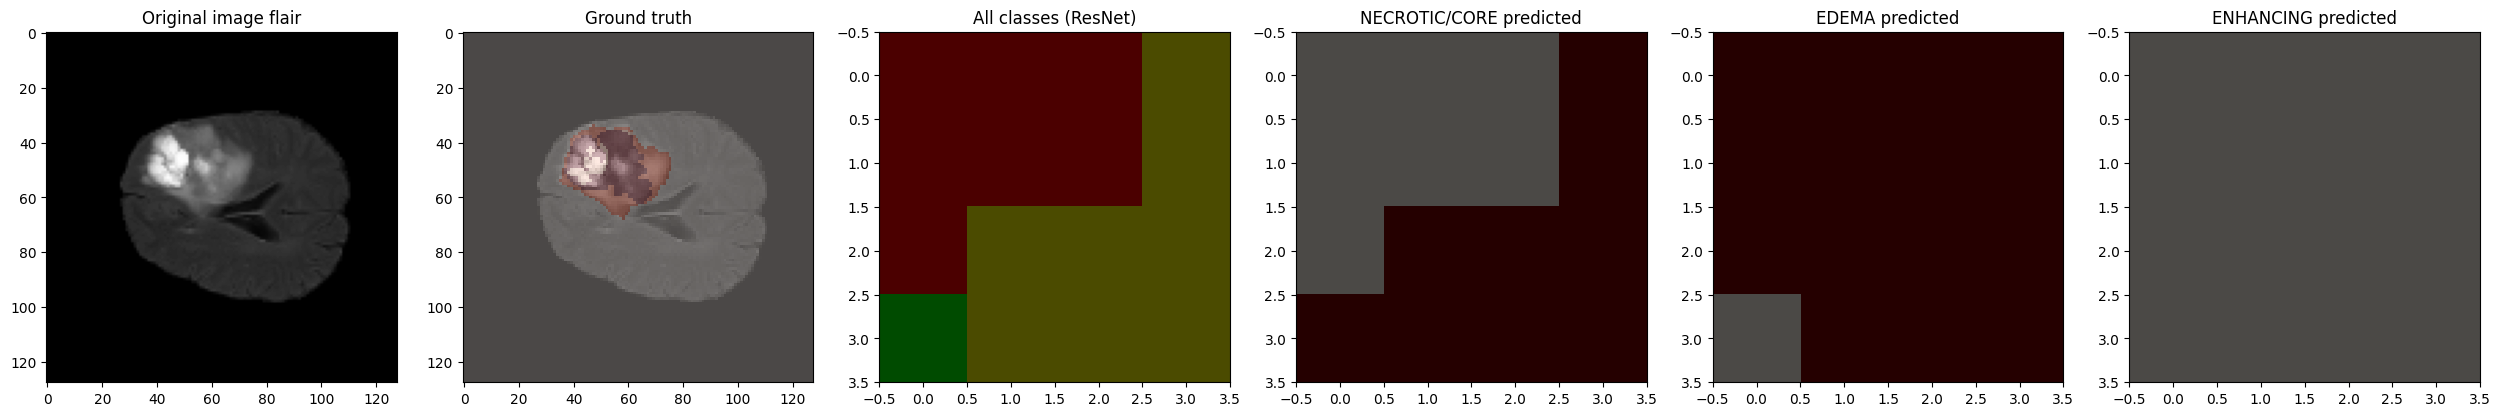

Flair image path: ./BraTS2021_Training_Data/BraTS2021_00336/BraTS2021_00336_flair.nii.gz


<Figure size 2500x5000 with 0 Axes>

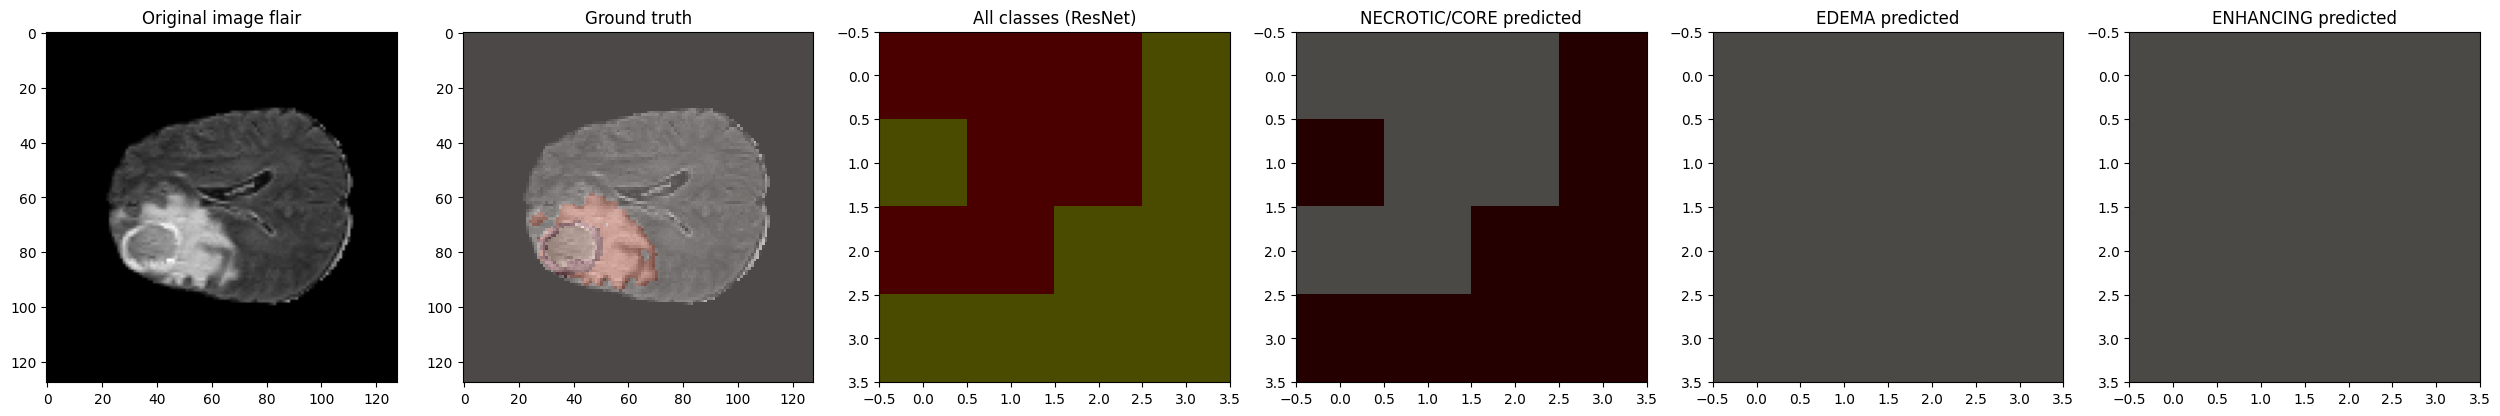

Flair image path: ./BraTS2021_Training_Data/BraTS2021_01446/BraTS2021_01446_flair.nii.gz


<Figure size 2500x5000 with 0 Axes>

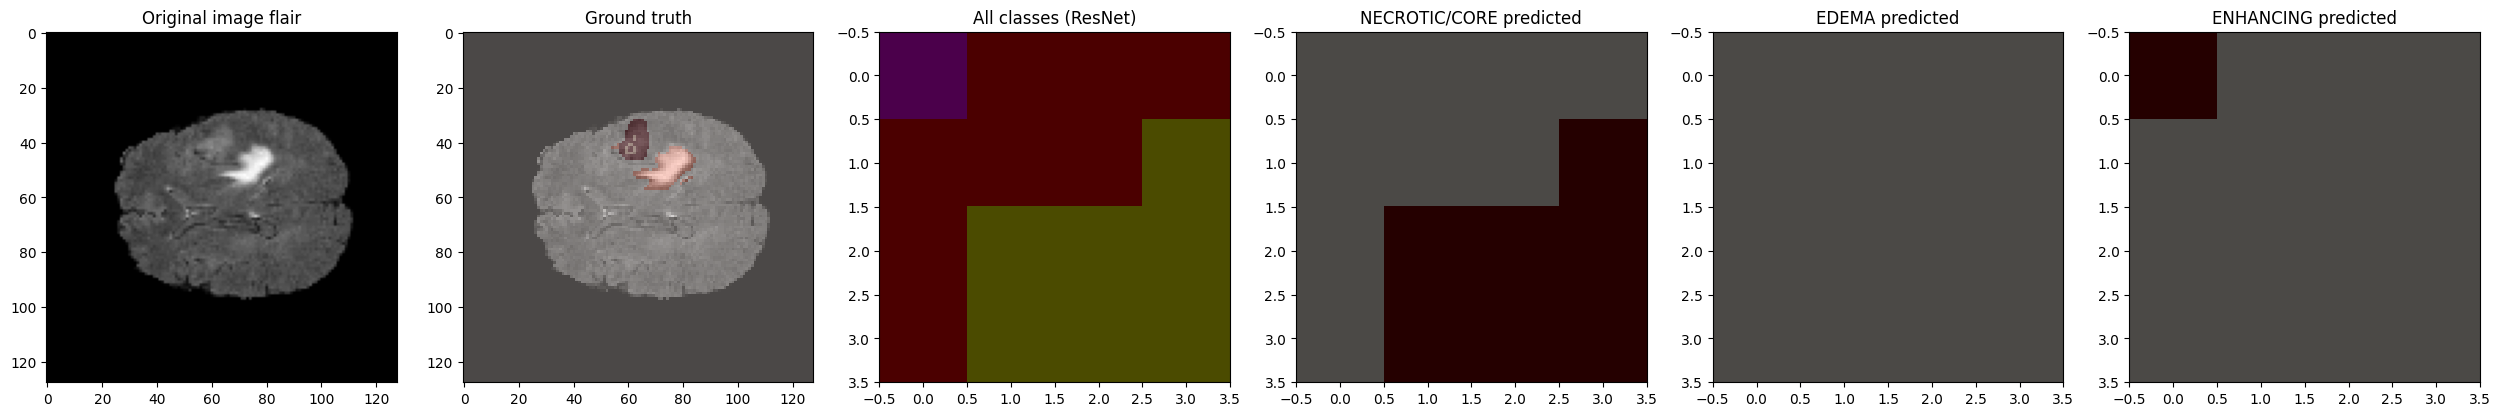

In [30]:
import os
import numpy as np
import nibabel as nib
import cv2
import torch
import matplotlib.pyplot as plt

# Make sure these global variables are defined (adjust as needed)
SEGMENT_CLASSES = {
    0 : 'NOT tumor',   
    1 : 'NECROTIC/CORE', # or NON-ENHANCING tumor CORE - RED
    2 : 'EDEMA',  # Green
    3 : 'ENHANCING' # original 4 -> converted into 3 later, Yellow
}

# there are 155 slices per volume
# to start at 5 and use 145 slices means we will skip the first 5 and last 5 
VOLUME_SLICES = 100 
VOLUME_START_AT = 22 # first slice of volume that we will include

IMG_SIZE=128

def predict_single(case_path, case, model1):
    # Create an empty array for VOLUME_SLICES slices with shape (IMG_SIZE, IMG_SIZE, 2)
    X = np.empty((VOLUME_SLICES, IMG_SIZE, IMG_SIZE, 2))
    
    vol_path_flair = os.path.join(case_path, f'{case}_flair.nii.gz')
    print(f'Flair image path: {vol_path_flair}')

    try:
        flair = nib.load(vol_path_flair).get_fdata()
    except FileNotFoundError:
        print(f"Error: Flair image file not found for case {case}")
        return None

    # Fill channel 0 with resized flair slices.
    for j in range(VOLUME_SLICES):
        X[j, :, :, 0] = cv2.resize(flair[:, :, j + VOLUME_START_AT], (IMG_SIZE, IMG_SIZE))
    
    # Fill channel 1 with zeros (or duplicate channel 0 if desired)
    X[:, :, :, 1] = 0

    # Normalize input
    X = X / np.max(X)
    
    # ResNet expects 3-channel input.
    if X.shape[-1] == 2:
        # Duplicate channel 0 to create a third channel.
        X = np.concatenate([X, X[:, :, :, 0:1]], axis=-1)  # Now shape becomes (VOLUME_SLICES, IMG_SIZE, IMG_SIZE, 3)
    
    # Convert NumPy array to torch tensor.
    input_tensor = torch.from_numpy(X).float()      # shape: (VOLUME_SLICES, IMG_SIZE, IMG_SIZE, 3)
    input_tensor = input_tensor.permute(0, 3, 1, 2)     # shape: (VOLUME_SLICES, 3, IMG_SIZE, IMG_SIZE)
    
    model1.eval()
    with torch.no_grad():
        outputs = model1(input_tensor)
        # Extract the tensor from the output; here we use the last_hidden_state.
        last_hidden = outputs.last_hidden_state
        # Rearrange the output from (batch, channels, height, width) to (batch, height, width, channels)
        pred = last_hidden.permute(0, 2, 3, 1)
        pred = pred.cpu().numpy()
    
    # Threshold predictions (adjust threshold as needed)
    pred_thresh = (pred > 0.5).astype(np.float32)
    return pred_thresh

def show_predictions(case, model1, start_slice=60):
    # Build the case path.
    path = os.path.join(TRAIN_DATASET_PATH, case) + '/'
    
    # Load ground truth segmentation and original flair image.
    gt = nib.load(os.path.join(path, f'{case}_seg.nii.gz')).get_fdata()
    origImage = nib.load(os.path.join(path, f'{case}_flair.nii.gz')).get_fdata()
    
    # Get predictions from model1.
    p = predict_single(path, case, model1)
    if p is None:
        return

    # Extract segmentation classes.
    # Assumption: p has channels corresponding to:
    # channel 0: background, 1: core, 2: edema, 3: enhancing.
    core = p[:, :, :, 1]
    edema = p[:, :, :, 2]
    enhancing = p[:, :, :, 3]

    # Visualization
    figsize_x, figsize_y = 25, 50
    plt.figure(figsize=(figsize_x, figsize_y))
    f, axarr = plt.subplots(1, 6, figsize=(figsize_x, figsize_y))

    for i in range(6):
        axarr[i].imshow(cv2.resize(origImage[:, :, start_slice + VOLUME_START_AT], (IMG_SIZE, IMG_SIZE)),
                        cmap="gray", interpolation='none')

    axarr[0].imshow(cv2.resize(origImage[:, :, start_slice + VOLUME_START_AT], (IMG_SIZE, IMG_SIZE)), cmap="gray")
    axarr[0].set_title('Original image flair')
    
    curr_gt = cv2.resize(gt[:, :, start_slice + VOLUME_START_AT], (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_NEAREST)
    axarr[1].imshow(curr_gt, cmap="Reds", interpolation='none', alpha=0.3)
    axarr[1].set_title('Ground truth')
    
    axarr[2].imshow(p[start_slice, :, :, 1:4], cmap="Reds", interpolation='none', alpha=0.3)
    axarr[2].set_title('All classes (ResNet)')
    
    axarr[3].imshow(edema[start_slice, :, :], cmap="OrRd", interpolation='none', alpha=0.3)
    axarr[3].set_title(f'{SEGMENT_CLASSES[1]} predicted')
    
    axarr[4].imshow(core[start_slice, :, :], cmap="OrRd", interpolation='none', alpha=0.3)
    axarr[4].set_title(f'{SEGMENT_CLASSES[2]} predicted')
    
    axarr[5].imshow(enhancing[start_slice, :, :], cmap="OrRd", interpolation='none', alpha=0.3)
    axarr[5].set_title(f'{SEGMENT_CLASSES[3]} predicted')

    plt.tight_layout()
    plt.savefig(f'Test_Predictions_{case}.png', dpi=300)
    plt.show()

# List of cases for which to run predictions.
cases = [
    'BraTS2021_00124', 'BraTS2021_00054', 'BraTS2021_01172', 
    'BraTS2021_00191', 'BraTS2021_01342', 'BraTS2021_00097', 
    'BraTS2021_01625', 'BraTS2021_00451', 'BraTS2021_00336', 'BraTS2021_01446'
]

# Loop through each case using the ResNet model.
for case in cases:
    show_predictions(case, model)

In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import nibabel as nib
import cv2
import matplotlib.pyplot as plt

# ------------------------------
# Global variables (adjust as needed)
VOLUME_SLICES = 100             # Example: number of slices per volume
IMG_SIZE = 128                  # Target image size for each slice
VOLUME_START_AT = 0             # Offset into the volume slices
TRAIN_DATASET_PATH = "./BraTS2021_Training_Data/"  # Updated dataset path
SEGMENT_CLASSES = ["Background", "Core", "Edema", "Enhancing"]

# ------------------------------
# Dummy implementations of custom metric functions.
# Replace these with your actual implementations.
def iou(y_true, y_pred, num_classes=4):
    intersection = np.sum(y_true * y_pred)
    union = np.sum(y_true) + np.sum(y_pred) - intersection
    return intersection / (union + 1e-6)

def dice_coef(y_true, y_pred):
    return np.random.random()

def precision(y_true, y_pred):
    return np.random.random()

def sensitivity(y_true, y_pred):
    return np.random.random()

def specificity(y_true, y_pred):
    return np.random.random()

def dice_coef_necrotic(y_true, y_pred, epsilon=1e-6):
    return np.random.random()

def dice_coef_edema(y_true, y_pred, epsilon=1e-6):
    return np.random.random()

def dice_coef_enhancing(y_true, y_pred, epsilon=1e-6):
    return np.random.random()

# ------------------------------
# Ensure input images have the correct number of channels
# Input is assumed to be (batch, height, width, channels)
def preprocess_input(X_batch, expected_channels=3):
    current_channels = X_batch.shape[-1]
    
    if current_channels == expected_channels:
        return X_batch  # Already correct
    elif current_channels == 1:
        return np.repeat(X_batch, expected_channels, axis=-1)
    elif current_channels == 2:
        # Add a third channel of zeros
        return np.concatenate([X_batch, np.zeros_like(X_batch[..., :1])], axis=-1)
    elif current_channels > expected_channels:
        return X_batch[..., :expected_channels]
    else:
        raise ValueError(f"Unexpected number of channels: {current_channels}. Expected {expected_channels}.")

# ------------------------------
# Wrapper module that adds a segmentation head to the ResNet backbone.
class ResNetSegmentation(nn.Module):
    def __init__(self, resnet, num_classes=4, img_size=IMG_SIZE):
        super(ResNetSegmentation, self).__init__()
        self.resnet = resnet
        # For many Hugging Face ResNet models, the last_hidden_state has 2048 channels.
        # Adjust self.feature_channels if your model differs.
        self.feature_channels = 2048  
        self.conv_seg = nn.Conv2d(self.feature_channels, num_classes, kernel_size=1)
        self.img_size = img_size

    def forward(self, x):
        # x: (batch, 3, IMG_SIZE, IMG_SIZE)
        outputs = self.resnet(x)
        if hasattr(outputs, "last_hidden_state"):
            features = outputs.last_hidden_state  # shape: (batch, channels, H, W)
        else:
            features = outputs
        seg_logits = self.conv_seg(features)  # shape: (batch, num_classes, H, W)
        seg_logits = F.interpolate(seg_logits, size=(self.img_size, self.img_size), mode='bilinear', align_corners=False)
        return seg_logits

# ------------------------------
# Evaluation function for the segmentation model.
def predict_resnet_eval(generator, seg_model, device):
    seg_model.eval()  # Set model to evaluation mode
    total_metrics = {
        "iou": 0,
        "dice": 0,
        "precision": 0,
        "recall": 0,
        "specificity": 0,
        "dice_necrotic": 0,
        "dice_edema": 0,
        "dice_enhancing": 0
    }
    batch_count = 0

    with torch.no_grad():
        for X_batch, y_batch in generator:
            print(f"Input batch shape before preprocessing: {X_batch.shape}")
            X_batch = preprocess_input(X_batch)  # Now shape: (batch, height, width, 3)
            X_batch = torch.tensor(X_batch, dtype=torch.float32).to(device)
            X_batch = X_batch.permute(0, 3, 1, 2)  # (batch, channels, height, width)
            
            logits = seg_model(X_batch)  # (batch, num_classes, IMG_SIZE, IMG_SIZE)
            probs = torch.sigmoid(logits)
            pred = probs.permute(0, 2, 3, 1)  # (batch, IMG_SIZE, IMG_SIZE, num_classes)
            pred_np = pred.cpu().numpy()
            
            binary_pred = (pred_np > 0.5).astype(np.float32)
            metrics = evaluate_metrics(y_batch, binary_pred)
            for key in total_metrics:
                total_metrics[key] += metrics[key]
            batch_count += 1

    for key in total_metrics:
        total_metrics[key] /= batch_count
    return total_metrics

# ------------------------------
# Evaluate metrics for each batch.
def evaluate_metrics(y_true, y_pred):
    results = {}
    results["iou"] = iou(y_true, y_pred)
    results["dice"] = dice_coef(y_true, y_pred)
    results["precision"] = precision(y_true, y_pred)
    results["recall"] = sensitivity(y_true, y_pred)
    results["specificity"] = specificity(y_true, y_pred)
    results["dice_necrotic"] = dice_coef_necrotic(y_true, y_pred, epsilon=1e-6)
    results["dice_edema"] = dice_coef_edema(y_true, y_pred, epsilon=1e-6)
    results["dice_enhancing"] = dice_coef_enhancing(y_true, y_pred, epsilon=1e-6)
    return results

# ------------------------------
# Set up device.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 'model' should be your base ResNet model loaded previously.
# Ensure your ResNet model is loaded and assigned to 'model'
model.to(device)

# Wrap your ResNet model with the segmentation head.
seg_model = ResNetSegmentation(model, num_classes=4, img_size=IMG_SIZE)
seg_model.to(device)

# Assume valid_generator is defined and yields batches (X_batch, y_batch)
metrics = predict_resnet_eval(valid_generator, seg_model, device)

# Print the computed metrics.
print("Test Loss: Not Computed in ResNet Evaluation")
print("Test Accuracy: Not Computed in ResNet Evaluation")
print("Mean IoU:", metrics["iou"])
print("Dice Coefficient:", metrics["dice"])
print("Precision:", metrics["precision"])
print("Sensitivity (Recall):", metrics["recall"])
print("Specificity:", metrics["specificity"])
print("Dice Coefficient Necrotic:", metrics["dice_necrotic"])
print("Dice Coefficient Edema:", metrics["dice_edema"])
print("Dice Coefficient Enhancing:", metrics["dice_enhancing"])



Input batch shape before preprocessing: (100, 128, 128, 2)
Input batch shape before preprocessing: (100, 128, 128, 2)
Input batch shape before preprocessing: (100, 128, 128, 2)
Input batch shape before preprocessing: (100, 128, 128, 2)
Input batch shape before preprocessing: (100, 128, 128, 2)
Input batch shape before preprocessing: (100, 128, 128, 2)
Input batch shape before preprocessing: (100, 128, 128, 2)
Input batch shape before preprocessing: (100, 128, 128, 2)
Input batch shape before preprocessing: (100, 128, 128, 2)
Input batch shape before preprocessing: (100, 128, 128, 2)
Input batch shape before preprocessing: (100, 128, 128, 2)
Input batch shape before preprocessing: (100, 128, 128, 2)
Input batch shape before preprocessing: (100, 128, 128, 2)
Input batch shape before preprocessing: (100, 128, 128, 2)
Input batch shape before preprocessing: (100, 128, 128, 2)
Input batch shape before preprocessing: (100, 128, 128, 2)
Input batch shape before preprocessing: (100, 128, 128, 

<ipython-input-22-7b248c6bc0b6>:67: RuntimeWarning: invalid value encountered in divide
  return X/np.max(X), Y


Input batch shape before preprocessing: (100, 128, 128, 2)


<ipython-input-31-1f9892efa085>:116: RuntimeWarning: invalid value encountered in greater
  binary_pred = (pred_np > 0.5).astype(np.float32)


Input batch shape before preprocessing: (100, 128, 128, 2)
Input batch shape before preprocessing: (100, 128, 128, 2)
Input batch shape before preprocessing: (100, 128, 128, 2)
Input batch shape before preprocessing: (100, 128, 128, 2)
Input batch shape before preprocessing: (100, 128, 128, 2)
Input batch shape before preprocessing: (100, 128, 128, 2)
Input batch shape before preprocessing: (100, 128, 128, 2)
Input batch shape before preprocessing: (100, 128, 128, 2)
Input batch shape before preprocessing: (100, 128, 128, 2)
Input batch shape before preprocessing: (100, 128, 128, 2)
Input batch shape before preprocessing: (100, 128, 128, 2)
Input batch shape before preprocessing: (100, 128, 128, 2)
Input batch shape before preprocessing: (100, 128, 128, 2)
Input batch shape before preprocessing: (100, 128, 128, 2)
Input batch shape before preprocessing: (100, 128, 128, 2)
Input batch shape before preprocessing: (100, 128, 128, 2)
Input batch shape before preprocessing: (100, 128, 128, 